In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\data-master\\data-master\\delaney_solubility_with_descriptors.csv")
df # here 	MolLogP	MolWt	NumRotatableBonds	AromaticProportion are x variables and logS is y variable so based on x variables iam going to predict the y varaible

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Separation as x and y ,  now iam going to split as x variables and y variables
## here iam trying to split data into x and y which requried for further for train ,test data  



In [3]:
y=df['logS'] # y variable contain logS column which is stored in y variable 
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
x=df.drop('logS',axis=1) # here iam trying to drop the logS column then we can store rest of the columns in x variable, and axis=1 means it allows us select columns when axis=1if axis =0 it allows us to select rows
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Now we are splitting the data into training set and testing set 
## when iam trying to train the data of x variable based on the test size suppose if i given test size as 0.2 it means 80% of data of x variable given to model to train the data and 20% of the data is given to model to test the data 
## it means the x varible got split into 2 parts which are train and test data 
## it repeats same for the y varible too got split into 2 parts which are train and test data 

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100) # here we created 4 varibales which are x_train,x_test,y_train,y_test  


In [6]:
x_train # as we know based on test size data get split into percentage above i have given test_size =0.2 it means 20% data given to test the data and 80% of data given to train the data 
         # as we can see in the output x varaible contains 1144 rows total out of 1144(rows)x80%=915 rows given to x_train  to train the data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [7]:
x_test  # as we can see in the output we got 229 rows which is 20% of rows of 1144 total rows which x varaible contains total out of 1144(rows)x20%=229 rows given to x_test  to test the data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


## Model building 
### Training the model

In [44]:
from sklearn.linear_model import LinearRegression # from linear_model module of sklearn library i have imported the LinearRegression model for to predict the data by using trainig dataset 
lr=LinearRegression() # here i have created 1 variable which is lr and it got assigned to LinearRegression() model 
lr.fit(x_train,y_train) # here by using lr variable which it contain linearregression() model and we are training data (which is 80% of data set which are x_train,y_train which are in x,y varibales) the empty linear regression model by using fit 
 # by the below output glimpse we can say the linear regression model got build, so when the model got build and we want to apply this particular model to make prediction 

LinearRegression()

### Applying the model which got build to make prediction  by using train and test data of which are x_train  which 80% and x_test which is  20% of x variable of  total data 

In [9]:
y_lr_train_pred=lr.predict(x_train) # here y_lr_train_pred is a variable which is defined by user i have taken to remember it easily becoz here y_is just variable and lr_ is a iam using linear regression,train_iam using trained data  for prediction by taking x_train which is 80 % component of x variable, pred mean doing prediction , and iam predicting the x_train data which is got trained by lr model and doing prediction on x_train data which is already got trained 
y_lr_test_pred=lr.predict(x_test) # here y_lr_test_pred is a variable which is defined by user i have taken to remember it easily becoz here y_is just variable and lr_ is a iam using linear regression model ,test_ iam using test data for prediction by taking x_test data which is 20% component, pred mean doing prediction , and iam predicting the x_test data which is hidden data to lr model and doing prediction on x_test data 

In [10]:
y_lr_train_pred # here iam printing the 80% of the data which is x_train got predicted by using linear regression model which got trained by x_train data 

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [11]:
y_lr_test_pred  # here iam prinitng 20% of the data which is x_test got predicted by using linear regression modeland xtest which is hidden data to the trained lr model 

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

## Evaluate the model performance
## by comparing the y train with y_lr_train_pred or (which is predicted values of x_train)

In [12]:
y_train # it is the actual value

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [13]:
y_lr_train_pred # it is the x_train predicted values

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [14]:
from sklearn.metrics import mean_squared_error, r2_score # i have imported the mean_squared_error, r2_score functions from metrics module of sklearn library ,mean_squared_error, r2_score functions which are needed to evaluate model performance 
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred) # iam trying to calculate the mean_squared_error of y_train & (predicted)x_train which is y_lr_train_pred and storing it in lr_train_mse
lr_train_r2_score=r2_score(y_train,y_lr_train_pred) # iam trying to calculate the r2_score of y_train & (predicted)x_train which is y_lr_train_pred and storing it in lr_train_r2_score

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)# iam trying to calculate the mean_squared_error of y_test & (predicted)x_test which is y_lr_test_pred and storing it in lr_test_mse
lr_test_r2_score=r2_score(y_test,y_lr_test_pred) # iam trying to calculate the r2_score of y_test & (predicted)x_test which is y_lr_train_pred and storing it in lr_test_r2_score

In [15]:
print("LR MSE (Train): ",lr_train_mse)
print("LR R2_SCORE (Train) ",lr_train_r2_score)
print("LR MSE (Test): ",lr_test_mse)
print("LR R2_SCORE (Test) ",lr_test_r2_score)
 

LR MSE (Train):  1.0075362951093687
LR R2_SCORE (Train)  0.7645051774663391
LR MSE (Test):  1.0206953660861036
LR R2_SCORE (Test)  0.7891616188563282


 ##  Creating a dataframe and loading mean_squared_error and R2_score o/p values of train and test

In [16]:
lr_results=pd.DataFrame(['Linear Regression',lr_train_mse,lr_train_r2_score,lr_test_mse,lr_test_r2_score]).transpose() # here i have created dataframe which contains the values of lr_train_mse,lr_train_r2_score,lr_test_mse,lr_test_r2_score 
lr_results.columns=['Method','Training MSE','Training R2_score','Test MSE','Test R2_Score' ] # here changing the column names of a data frame according to output which name it is referring 

In [17]:
lr_results # This lr_results varaible contain the data frame which it contain o/p values of Training MSE	Training R2_score	Test MSE	Test R2_Score of linear regression model which the lr_results varaible is very useful to compare the performance of linear regression model with the other ml models for getting to know which particular model fits best to the dataset 

,Method,Training MSE,Training R2_score,Test MSE,Test R2_Score
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


# Random Forest (Regression Model) 

In [45]:
from sklearn.ensemble import RandomForestRegressor # here i have imported RandomForestRegressor from ensemble module of sklearn library and Random forest are 2 types 1 regressor and 2 classfication but iam using regressor becoz the y variable which is logS feature contain Quantitative value so for Quantitative value we need use Regression in Random forest and if we have categorical values in y feature which is Logs then we need to use Classifcation in random forest  
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train) # here by using rf variable which it contain RandomForestRegressor() model and we are training data (which is 80% of data set which are x_train,y_train which are in x,y varibales) the empty RandomForestRegressor model by using fit , The fit() method is a key step in the machine learning pipeline, as it is responsible for training the model on the available data and preparing it for deployment on new, unseen data. Once the model is trained, it can be used to make predictions on new data using the predict() method.
 # by the below output glimpse we can say the RandomForestRegressor() model got build, so when the model got build and we want to apply this particular model to make prediction 

RandomForestRegressor(max_depth=2, random_state=100)

# Applying the model to make prediction

In [19]:
y_rf_train_pred=rf.predict(x_train) # here y_rf_train_pred is a variable which is defined by user i have taken to remember it easily becoz here y_is just variable and lr_ is a iam using RandomForestRegressor,train_ iam using trained data  for prediction by taking x_train which is 80 % component in x varaible, pred mean doing prediction , and iam predicting the x_train data which is got trained by rf model and doing prediction on x_train data which is already got trained 
y_rf_test_pred=rf.predict(x_test)

# Evaluate the model performance

In [20]:
from sklearn.metrics import mean_squared_error, r2_score # i have imported the mean_squared_error, r2_score functions from metrics module of sklearn library ,mean_squared_error, r2_score functions which are needed to evaluate model performance 
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred) # iam trying to calculate the mean_squared_error of y_train & (predicted)x_train which is y_rf_train_pred and storing it in rf_train_mse
rf_train_r2_score=r2_score(y_train,y_rf_train_pred) # iam trying to calculate the r2_score of y_train & (predicted)x_train which is y_rf_train_pred and storing it in rf_train_r2_score

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)# iam trying to calculate the mean_squared_error of y_test & (predicted)x_test which is y_rf_test_pred and storing it in rf_test_mse
rf_test_r2_score=r2_score(y_test,y_rf_test_pred) # iam trying to calculate the r2_score of y_test & (predicted)x_test which is y_rf_train_pred and storing it in rf_test_r2_score

In [21]:
rf_results=pd.DataFrame(['Random Forest ',rf_train_mse,rf_train_r2_score,rf_test_mse,rf_test_r2_score]).transpose() # here i have created dataframe which contains the values of rf_train_mse,rf_train_r2_score,rf_test_mse,rf_test_r2_score,The transpose() method returns a new array or matrix where the rows and columns of the original array or matrix are swapped. In other words, the rows of the original matrix become the columns of the transposed matrix, and the columns of the original matrix become the rows of the transposed matrix. 
rf_results.columns=['Method','Training MSE','Training R2_score','Test MSE','Test R2_Score' ] # here changing the column names of a data frame according to output which name it is referring 

In [22]:
rf_results

,Method,Training MSE,Training R2_score,Test MSE,Test R2_Score
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [23]:
df_models=pd.concat([lr_results,rf_results],axis=0) # here iam trying to concat the model performance of Linear Regression and Random Forest then it would easy to compare the model performance on dataset whether the model fits very well to a data set or not
df_models # To determine if a model is a generalized model, you need to compare its performance on the training data to its performance on the test data.

# Looking at the results in your table, you can see that the Linear Regression model has a slightly lower MSE and higher R2 score , so on the test data and trained data of (linear regression) as compared to test data and training data of (Random forest model).it seems like that we got low MSE and High R2_score in Linear Regression This is a good sign that the linear Regression model is able to generalize well to new, unseen data.

# On the other hand, the Random Forest model has a much higher MSE and lower R2 score on the test data and trained data, This suggests that the model is overfitting the training data and is not able to generalize well to new data.

,Method,Training MSE,Training R2_score,Test MSE,Test R2_Score
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [27]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2_score,Test MSE,Test R2_Score
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization of prediction results

<Figure size 500x500 with 0 Axes>

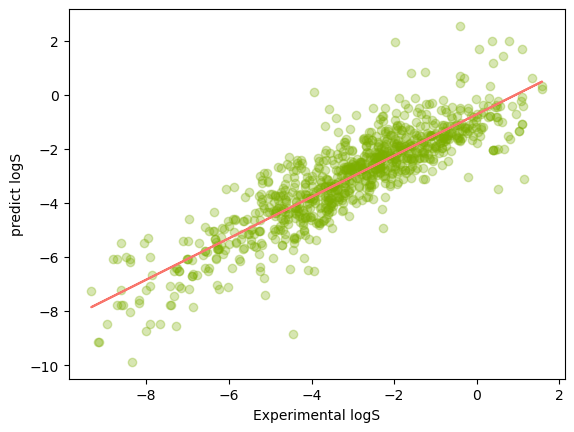

<Figure size 500x500 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3,c="#7CAE00") # here iam trying to do scatter plot between y_train(actual values) and y_lr_train_pred(whixh is x_train predicted values),and alpha=0.3 means i have set alpha value as 0.3 becoz for getting to know the regions which are overlapping are little bit darker and region where there are getting overlapping is in light colour,AND C is the colour option to get on the scatter plot by writing some alphanumeric  code 
z=np.polyfit(y_train,y_lr_train_pred,1)# np.polyfit(y_train, y_lr_train_pred, 1) fits a first-degree polynomial (i.e., a straight line) to the training data. y_train is the dependent variable (i.e., the output variable) and y_lr_train_pred is the independent variable (i.e., the input variable) in this regression. The output of this function is a set of coefficients that define the best-fit line for the data.
p=np.poly1d(z)# np.poly1d(z) creates a one-dimensional polynomial object p using the coefficients z obtained from the np.polyfit function. This polynomial represents the best-fit line for the data.

plt.plot(y_train,p(y_train),'#F8766D')# plt.plot(y_train, p(y_train), '#F8766D') plots the training data on the x-axis (y_train) and the predicted output variable based on the best-fit line on the y-axis (p(y_train)). The third argument ('#F8766D') specifies the color of the line.The p(y_train) function call uses the polynomial object p created earlier with poly1d to generate the predicted output variable values for each corresponding y_train input variable.By plotting the training data together with the best-fit line, we can visually inspect how well the model fits the data. If the best-fit line closely follows the trend of the data, then the model is likely a good fit. If the line deviates significantly from the data, then the model may not be a good fit and may need to be adjusted.

plt.ylabel('predict logS') # it is used to labels of x axis and y axis
plt.xlabel('Experimental logS')
plt.figure(figsize=(5,5)) # it is used to adjust the figure size of plot diagram 

